### 1. 获取数据，定义问题

这里我们用UCI大学公开的机器学习数据来跑线性回归。

数据的介绍在这： http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

数据的下载地址在这： http://archive.ics.uci.edu/ml/machine-learning-databases/00294/

里面是一个循环发电场的数据，共有9568个样本数据，每个数据有5列，分别是:AT（温度）, V（压力）, AP（湿度）, RH（压强）, PE（输出电力)。我们不用纠结于每项具体的意思。

我们的问题是得到一个线性的关系，对应PE是样本输出，而AT/V/AP/RH这4个是样本特征， 机器学习的目的就是得到一个线性回归模型，即:

PE=θ0+θ1∗AT+θ2∗V+θ3∗AP+θ4∗RH
而需要学习的，就是θ0,θ1,θ2,θ3,θ4这5个参数。

### 2.用pandas来读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn import datasets

In [18]:
# 读取excel数据
data  = pd.read_excel('data/Folds5x2_pp.xlsx')

In [19]:
#读取前五行数据，如果是最后五行，用data.tail()
data.head()
#data = data[-2000:]
data.size

47840

### 3.准备运行算法的数据

In [20]:
data.shape #看数据的维度
## 结果是(9568, 5)。说明我们有9568个样本，每个样本有5列。

(9568, 5)

In [21]:
## 现在我们开始准备样本特征X，我们用AT， V，AP和RH这4个列作为样本特征。
X = data[['AT','V','AP','RH']]

In [22]:
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [23]:
## 接着我们准备样本输出y， 我们用PE作为样本输出
y = data[['PE']] 

In [24]:
# 可以看到y的前五条输出如下：
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


### 4.划分训练集和测试集

In [25]:
# 我们把X和y的样本组合划分成两部分，一部分是训练集，一部分是测试集，代码如下：
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=1234)

In [26]:
# 查看下训练集和测试集的维度(可以看到75%的样本数据被作为训练集，25%的样本被作为测试集。)：
#X_train.shape
#X_test.shape
#y_train.shape
y_test.shape

(6698, 1)

## 5.运行scikit-learn的线性模型

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# 需要的模型系数结果：
lr.intercept_

array([ 433.19384945])

In [32]:
lr.coef_ 
　

array([[-1.96397321, -0.23855651,  0.08326357, -0.15839596]])

In [15]:
# PE=433.19384945-1.96397321∗AT-0.23855651∗V+0.08326357∗AP-0.15839596∗RH

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 6.模型评价

#### 对于线性回归来说，我们一般用均方差（Mean Squared Error, MSE）或者均方根差(Root Mean Squared Error, RMSE)在测试集上的表现来评价模型的好坏

In [33]:
# 模型拟合测试集
y_hat = lr.predict(X_test)

In [34]:
from sklearn import metrics

In [35]:
# 用scikit-learn计算MSE
metrics.mean_squared_error(y_test,y_hat) # 20.942356447191262

20.942356447191262

In [36]:
# 用scikit-learn计算RMSE
np.sqrt(metrics.mean_squared_error(y_test,y_hat)) # 4.5762819457711803

4.5762819457711803

#### 得到了MSE或者RMSE，如果我们用其他方法得到了不同的系数，需要选择模型时，就用MSE小的时候对应的参数。

#### 比如这次我们用AT， V，AP这3个列作为样本特征。不要RH， 输出仍然是PE。代码如下：

In [43]:
X2 = data[['AT','V','AP']]
y2 = data[['PE']]
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,random_state = 1)
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X_train2,y_train2)

# 模型拟合测试集
y_hat2 = lr2.predict(X_test2)
metrics.mean_squared_error(y_test2,y_hat2) # 23.905653799527798

# 用scikit-learn计算RMSE
np.sqrt(metrics.mean_squared_error(y_test2,y_hat2)) # 4.8893408348700538

4.8893408348700538

### 可以看出，去掉RH后，模型拟合的没有加上RH的好，MSE变大了。

### 7.交叉验证

#### 我们可以通过交叉验证来持续优化模型，代码如下，我们采用10折交叉验证，即cross_val_predict中的cv参数为10：

In [45]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(lr,X,y,cv = 10)

In [46]:
# 用scikit-learn计算MSE
metrics.mean_squared_error(y,predicted) # 20.793672509857537

20.793672509857537

In [47]:
# 用scikit-learn计算RMSE
np.sqrt(metrics.mean_squared_error(y, predicted)) # 4.5600079506353426

4.5600079506353426

### 8.画图观察结果

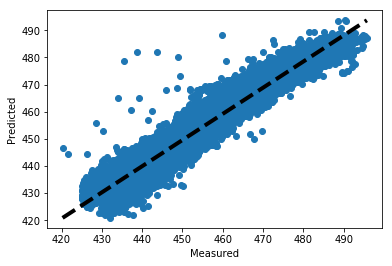

In [53]:
fig,ax = plt.subplots()
ax.scatter(y,predicted)
ax.plot([y.min(),y.max()],[predicted.min(),predicted.max()],'k--',lw = 4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()